In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pytz
import os
import requests

The generate_params function was used to set params for both a VMT and VHT scrapper. Adjust the 'q' value.

In [2]:
def generate_params(year):
    start_date = f'01/01/{year} 00:00:00'
    end_date = f'12/31/{year} 23:59:00'

    gmt = pytz.timezone('GMT')  # Use GMT timezone
    start_datetime = gmt.localize(datetime.datetime.strptime(start_date, '%m/%d/%Y %H:%M:%S'))
    end_datetime = gmt.localize(datetime.datetime.strptime(end_date, '%m/%d/%Y %H:%M:%S'))

    s_time_id = int(start_datetime.timestamp())
    e_time_id = int(end_datetime.timestamp())

    params = {
        'report_form': '1',
        'dnode': 'District',
        'content': 'loops',
        'tab': 'det_district_summary',
        'export': 'xls',
        'district_id': '12',
        's_time_id': str(s_time_id),
        's_time_id_f': start_datetime.strftime('%m/%d/%Y'),
        'e_time_id': str(e_time_id),
        'e_time_id_f': end_datetime.strftime('%m/%d/%Y'),
        'tod': 'all',
        'tod_from': '0',
        'tod_to': '0',
        'dow_0': 'on',
        'dow_1': 'on',
        'dow_2': 'on',
        'dow_3': 'on',
        'dow_4': 'on',
        'dow_5': 'on',
        'dow_6': 'on',
        'holidays': 'on',
        'q': 'vht',
    }

    return params

In [3]:
cookies = {
    'nmstat': '427c4c1c-3146-c5f9-1ad3-3d495785a86b',
    '__utmz': '267661199.1706304002.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none)',
    '_ga_WLDEF7NZZ2': 'GS1.1.1707246298.4.0.1707246298.0.0.0',
    '_ga_PXR8P55JR4': 'GS1.1.1707246298.4.0.1707246298.0.0.0',
    '_ga_69TD0KNT0F': 'GS1.1.1707246298.4.0.1707246298.0.0.0',
    '__utma': '158387685.1813768829.1706303996.1708129754.1708129754.1',
    '__utmz': '158387685.1708129754.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none)',
    'PHPSESSID': 'ac15ad1a15581add20d029523dc979d6',
    '__utmc': '267661199',
    '_gid': 'GA1.2.1997479447.1709956747',
    '_ga': 'GA1.1.1813768829.1706303996',
    '_ga_2LNG7V2TGM': 'GS1.1.1709956747.1.1.1709957765.0.0.0',
    '__utma': '267661199.1813768829.1706303996.1709926451.1709957853.30',
    '__utmt': '1',
    '__utmb': '267661199.11.10.1709957853',
}

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Connection': 'keep-alive',
    # 'Cookie': 'nmstat=427c4c1c-3146-c5f9-1ad3-3d495785a86b; __utmz=267661199.1706304002.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); _ga_WLDEF7NZZ2=GS1.1.1707246298.4.0.1707246298.0.0.0; _ga_PXR8P55JR4=GS1.1.1707246298.4.0.1707246298.0.0.0; _ga_69TD0KNT0F=GS1.1.1707246298.4.0.1707246298.0.0.0; __utma=158387685.1813768829.1706303996.1708129754.1708129754.1; __utmz=158387685.1708129754.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); PHPSESSID=ac15ad1a15581add20d029523dc979d6; __utmc=267661199; _gid=GA1.2.1997479447.1709956747; _ga=GA1.1.1813768829.1706303996; _ga_2LNG7V2TGM=GS1.1.1709956747.1.1.1709957765.0.0.0; __utma=267661199.1813768829.1706303996.1709926451.1709957853.30; __utmt=1; __utmb=267661199.11.10.1709957853',
    'Referer': 'https://pems.dot.ca.gov/?report_form=1&dnode=District&content=loops&tab=det_district_summary&export=&district_id=12&s_time_id=1009843200&s_time_id_f=01%2F01%2F2002&e_time_id=1041379140&e_time_id_f=12%2F31%2F2002&tod=all&tod_from=0&tod_to=0&dow_0=on&dow_1=on&dow_2=on&dow_3=on&dow_4=on&dow_5=on&dow_6=on&holidays=on&q=vht&html.x=26&html.y=8',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-User': '?1',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36',
    'sec-ch-ua': '"Chromium";v="122", "Not(A:Brand";v="24", "Google Chrome";v="122"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
}

In [71]:
output_direct = '/Users/joelt/datahere/xlsx_files'

for year in range(2002, 2024):
    params = generate_params(year)
    response = requests.get('https://pems.dot.ca.gov/', params=params, cookies=cookies, headers=headers)

    # Save the response content to a file
    filename = os.path.join(output_direct, f'd12fwy{year}_VHT.xlsx')
    with open(filename, 'wb') as file:
        file.write(response.content)

    print(f'{filename} created successfully.')

/Users/joelt/datahere/xlsx_files/d12fwy2002_VHT.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12fwy2003_VHT.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12fwy2004_VHT.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12fwy2005_VHT.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12fwy2006_VHT.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12fwy2007_VHT.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12fwy2008_VHT.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12fwy2009_VHT.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12fwy2010_VHT.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12fwy2011_VHT.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12fwy2012_VHT.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12fwy2013_VHT.xlsx created successfully.
/Users/joelt/datahere/xlsx_files/d12fwy2014_VHT.xlsx created successfully.
/Users/joelt/datahere/xls

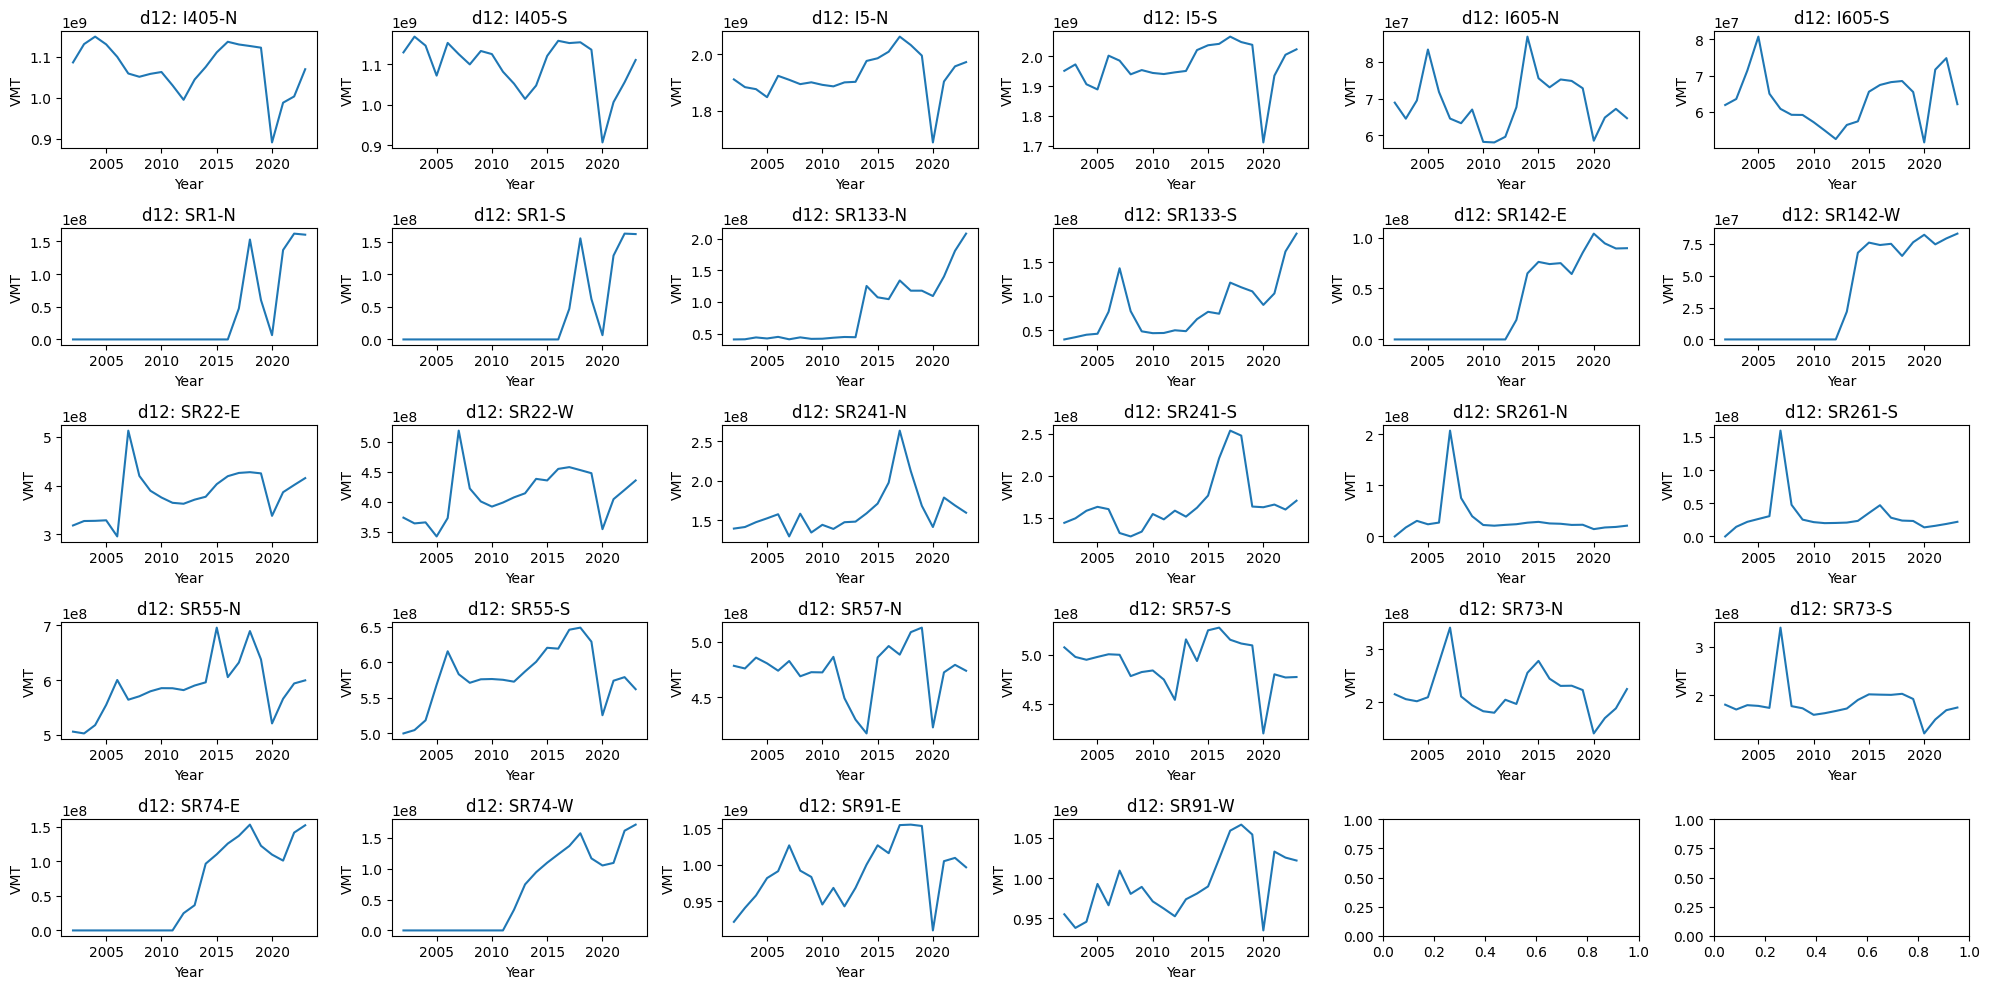

In [4]:
def plot_freeway_vmt(ax, freeway):
    file_names = [f'xlsx_files/d12fwy{year}.xlsx' for year in range(2002, 2024)]

    # Initialize a list to store tuples (year, VMT)
    data_list = []

    # Iterate over Excel files and directly extract data
    for file_name in file_names:
        year = int(file_name[-9:-5])
        df = pd.read_excel(file_name)

        # Check if the DataFrame is empty for the given freeway
        if not df[df['Freeway'] == freeway].empty:
            vmt_value = df[df['Freeway'] == freeway]['Vehicle Miles Traveled (VMT)'].iloc[0]
        else:
            vmt_value = 0

        data_list.append((year, vmt_value))

    # Create the result DataFrame directly from the list of tuples
    result_df = pd.DataFrame(data_list, columns=['Year', 'VMT'])

    # Plot the results
    ax.plot(result_df['Year'], result_df['VMT'], label=freeway)
    ax.set_title('d12: ' + freeway)
    ax.set_xlabel('Year')
    ax.set_ylabel('VMT')

# Create subplots for each freeway
fig, axs = plt.subplots(5, 6, figsize=(20, 10))
axs = axs.flatten()

# Iterate over the list of freeways
freeways = ['I405-N', 'I405-S', 'I5-N', 'I5-S', 'I605-N', 'I605-S', 'SR1-N',
            'SR1-S', 'SR133-N', 'SR133-S', 'SR142-E', 'SR142-W', 'SR22-E',
            'SR22-W', 'SR241-N', 'SR241-S', 'SR261-N', 'SR261-S', 'SR55-N',
            'SR55-S', 'SR57-N', 'SR57-S', 'SR73-N', 'SR73-S', 'SR74-E',
            'SR74-W', 'SR91-E', 'SR91-W']

# freeways = ['SR55-N', 'SR55-S', 'SR57-N', 'SR57-S',
#             'I5-N', 'I5-S', 'SR22-E', 'SR22-W']

for i, freeway in enumerate(freeways):
    plot_freeway_vmt(axs[i], freeway)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


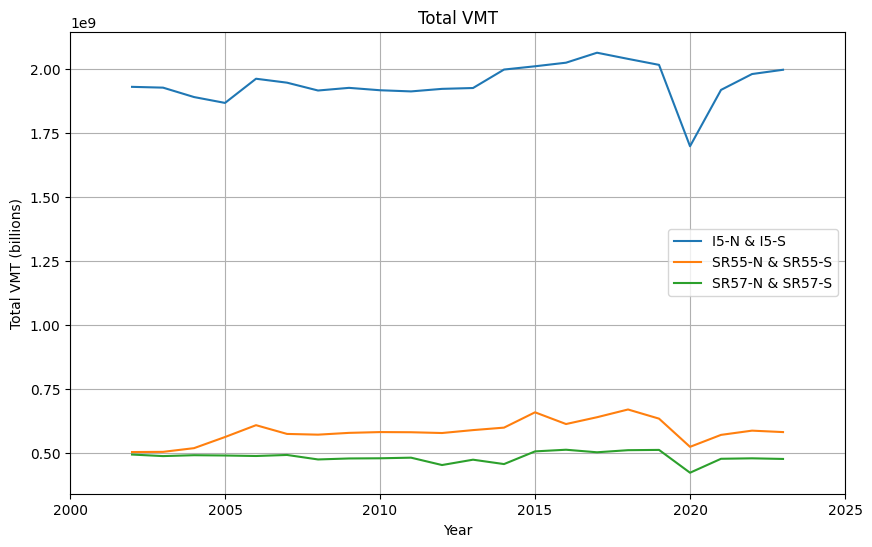

In [11]:
def plot_average_vmt(ax, freeway_pairs):
    file_names = [f'xlsx_files/d12fwy{year}.xlsx' for year in range(2002, 2024)]

    # Initialize a dictionary to store pairs of freeways and their VMT values
    data_dict = {pair: {'Years': [], 'VMT': []} for pair in freeway_pairs}

    # Iterate over Excel files and directly extract data
    for file_name in file_names:
        year = int(file_name[-9:-5])
        df = pd.read_excel(file_name)

        for pair in freeway_pairs:
            vmt_values = df[df['Freeway'].isin(pair)]['Vehicle Miles Traveled (VMT)']
            
            # Calculate the average VMT for the pair
            avg_vmt = vmt_values.mean() if not vmt_values.empty else 0

            data_dict[pair]['Years'].append(year)
            data_dict[pair]['VMT'].append(avg_vmt)

    # Plot the results for each freeway pair
    for pair, data in data_dict.items():
        ax.plot(data['Years'], data['VMT'], label=f'{pair[0]} & {pair[1]}')

    ax.set_xlabel('Year')
    ax.set_ylabel('Total VMT (billions)')

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Specify pairs of freeways to be averaged
freeway_pairs = [('I5-N', 'I5-S'),
                 ('SR55-N', 'SR55-S'), ('SR57-N', 'SR57-S'),
                ]

# Plot the average VMT for each pair
plot_average_vmt(ax, freeway_pairs)

# Add legend
ax.legend()
ax.set_title('Total VMT')
ax.set_xlim(2000, 2025)
ax.grid()
plt.show()


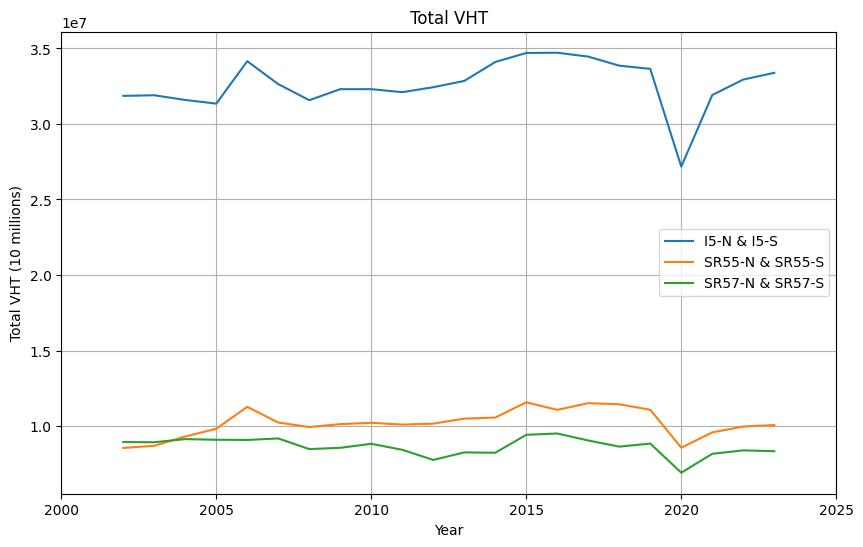

In [12]:
def plot_average_vht(ax, freeway_pairs):
    file_names = [f'xlsx_files/d12fwy{year}_VHT.xlsx' for year in range(2002, 2024)]

    # Initialize a dictionary to store pairs of freeways and their VMT values
    data_dict = {pair: {'Years': [], 'VHT': []} for pair in freeway_pairs}

    # Iterate over Excel files and directly extract data
    for file_name in file_names:
        year = int(file_name[-13:-9])
        df = pd.read_excel(file_name)

        for pair in freeway_pairs:
            vht_values = df[df['Freeway'].isin(pair)]['Vehicle Hours Traveled (VHT)']
            
            # Calculate the average VMT for the pair
            avg_vht = vht_values.mean() if not vht_values.empty else 0

            data_dict[pair]['Years'].append(year)
            data_dict[pair]['VHT'].append(avg_vht)

    # Plot the results for each freeway pair
    for pair, data in data_dict.items():
        ax.plot(data['Years'], data['VHT'], label=f'{pair[0]} & {pair[1]}')

    ax.set_xlabel('Year')
    ax.set_ylabel('Total VHT (10 millions)')

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Specify pairs of freeways to be averaged
freeway_pairs = [('I5-N', 'I5-S'),
                 ('SR55-N', 'SR55-S'), ('SR57-N', 'SR57-S'),
                ]

# Plot the average VMT for each pair
plot_average_vht(ax, freeway_pairs)

# Add legend
ax.legend()
ax.set_title('Total VHT')
ax.set_xlim(2000, 2025)
ax.grid()
plt.show()


In [14]:
def create_freeway_dataframe(freeways):
    file_names = [f'xlsx_files/d12fwy{year}_VHT.xlsx' for year in range(2002, 2024)]

    # Initialize a list to store data for selected freeways
    data_list = []

    # Iterate over Excel files and directly extract data
    for file_name in file_names:
        year = int(file_name[-13:-9])
        df = pd.read_excel(file_name)

        for freeway in freeways:
            vmt_values = df[df['Freeway'] == freeway]['Vehicle Hours Traveled (VHT)']
            
            # Calculate the total VMT for the freeway
            total_vmt = vmt_values.sum() if not vmt_values.empty else 0

            data_list.append({'Year': year, 'Freeway': freeway, 'Total VHT': total_vmt})

    # Create the result DataFrame directly from the list of dictionaries
    result_df = pd.DataFrame(data_list)

    return result_df

# Specify freeways to be included in the DataFrame
selected_freeways = ['I5-N', 'I5-S', 'SR55-N', 'SR55-S', 'SR57-N', 'SR57-S']

# Create the DataFrame
freeway_df = create_freeway_dataframe(selected_freeways)

# Display the DataFrame
print(freeway_df)


     Year Freeway    Total VHT
0    2002    I5-N  31756200.89
1    2002    I5-S  31962164.42
2    2002  SR55-N   8495603.11
3    2002  SR55-S   8614492.15
4    2002  SR57-N   8734882.38
..    ...     ...          ...
127  2023    I5-S  33162121.30
128  2023  SR55-N  10685178.97
129  2023  SR55-S   9463904.79
130  2023  SR57-N   8279865.74
131  2023  SR57-S   8402204.59

[132 rows x 3 columns]
